<a href="https://colab.research.google.com/github/nabil-nablotech/unicam-process-mining/blob/main/process_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Configure Google Collab.**




In Google Collab, click on Edit > Notebook Settings > Under Hardware Accelator, choose GPU.

# **2) Upload the dataset to the collab workspace.**

Upload the dataset to your google drive and then mount the drive to the collab workspace.

# **3) Install PM4PY using pip.**

In [ ]:
!pip install pm4py
import pm4py

# **4) Install Graphviz for visualization.**

In [ ]:
!apt-get -qq install -y graphviz

# **5) Import the dataset.**

In [ ]:
def import_xes(file_path):
    event_log = pm4py.read_xes(file_path)
    print("Dataset imported")
    return event_log


if __name__ == "__main__":
    log = import_xes("/content/drive/MyDrive/process mining/BPI_Challenge_2019-dataset.xes")

/usr/local/lib/python3.10/dist-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/251734 [00:00<?, ?it/s]

Dataset imported


# **6) Generate model using alpha algorithm.**

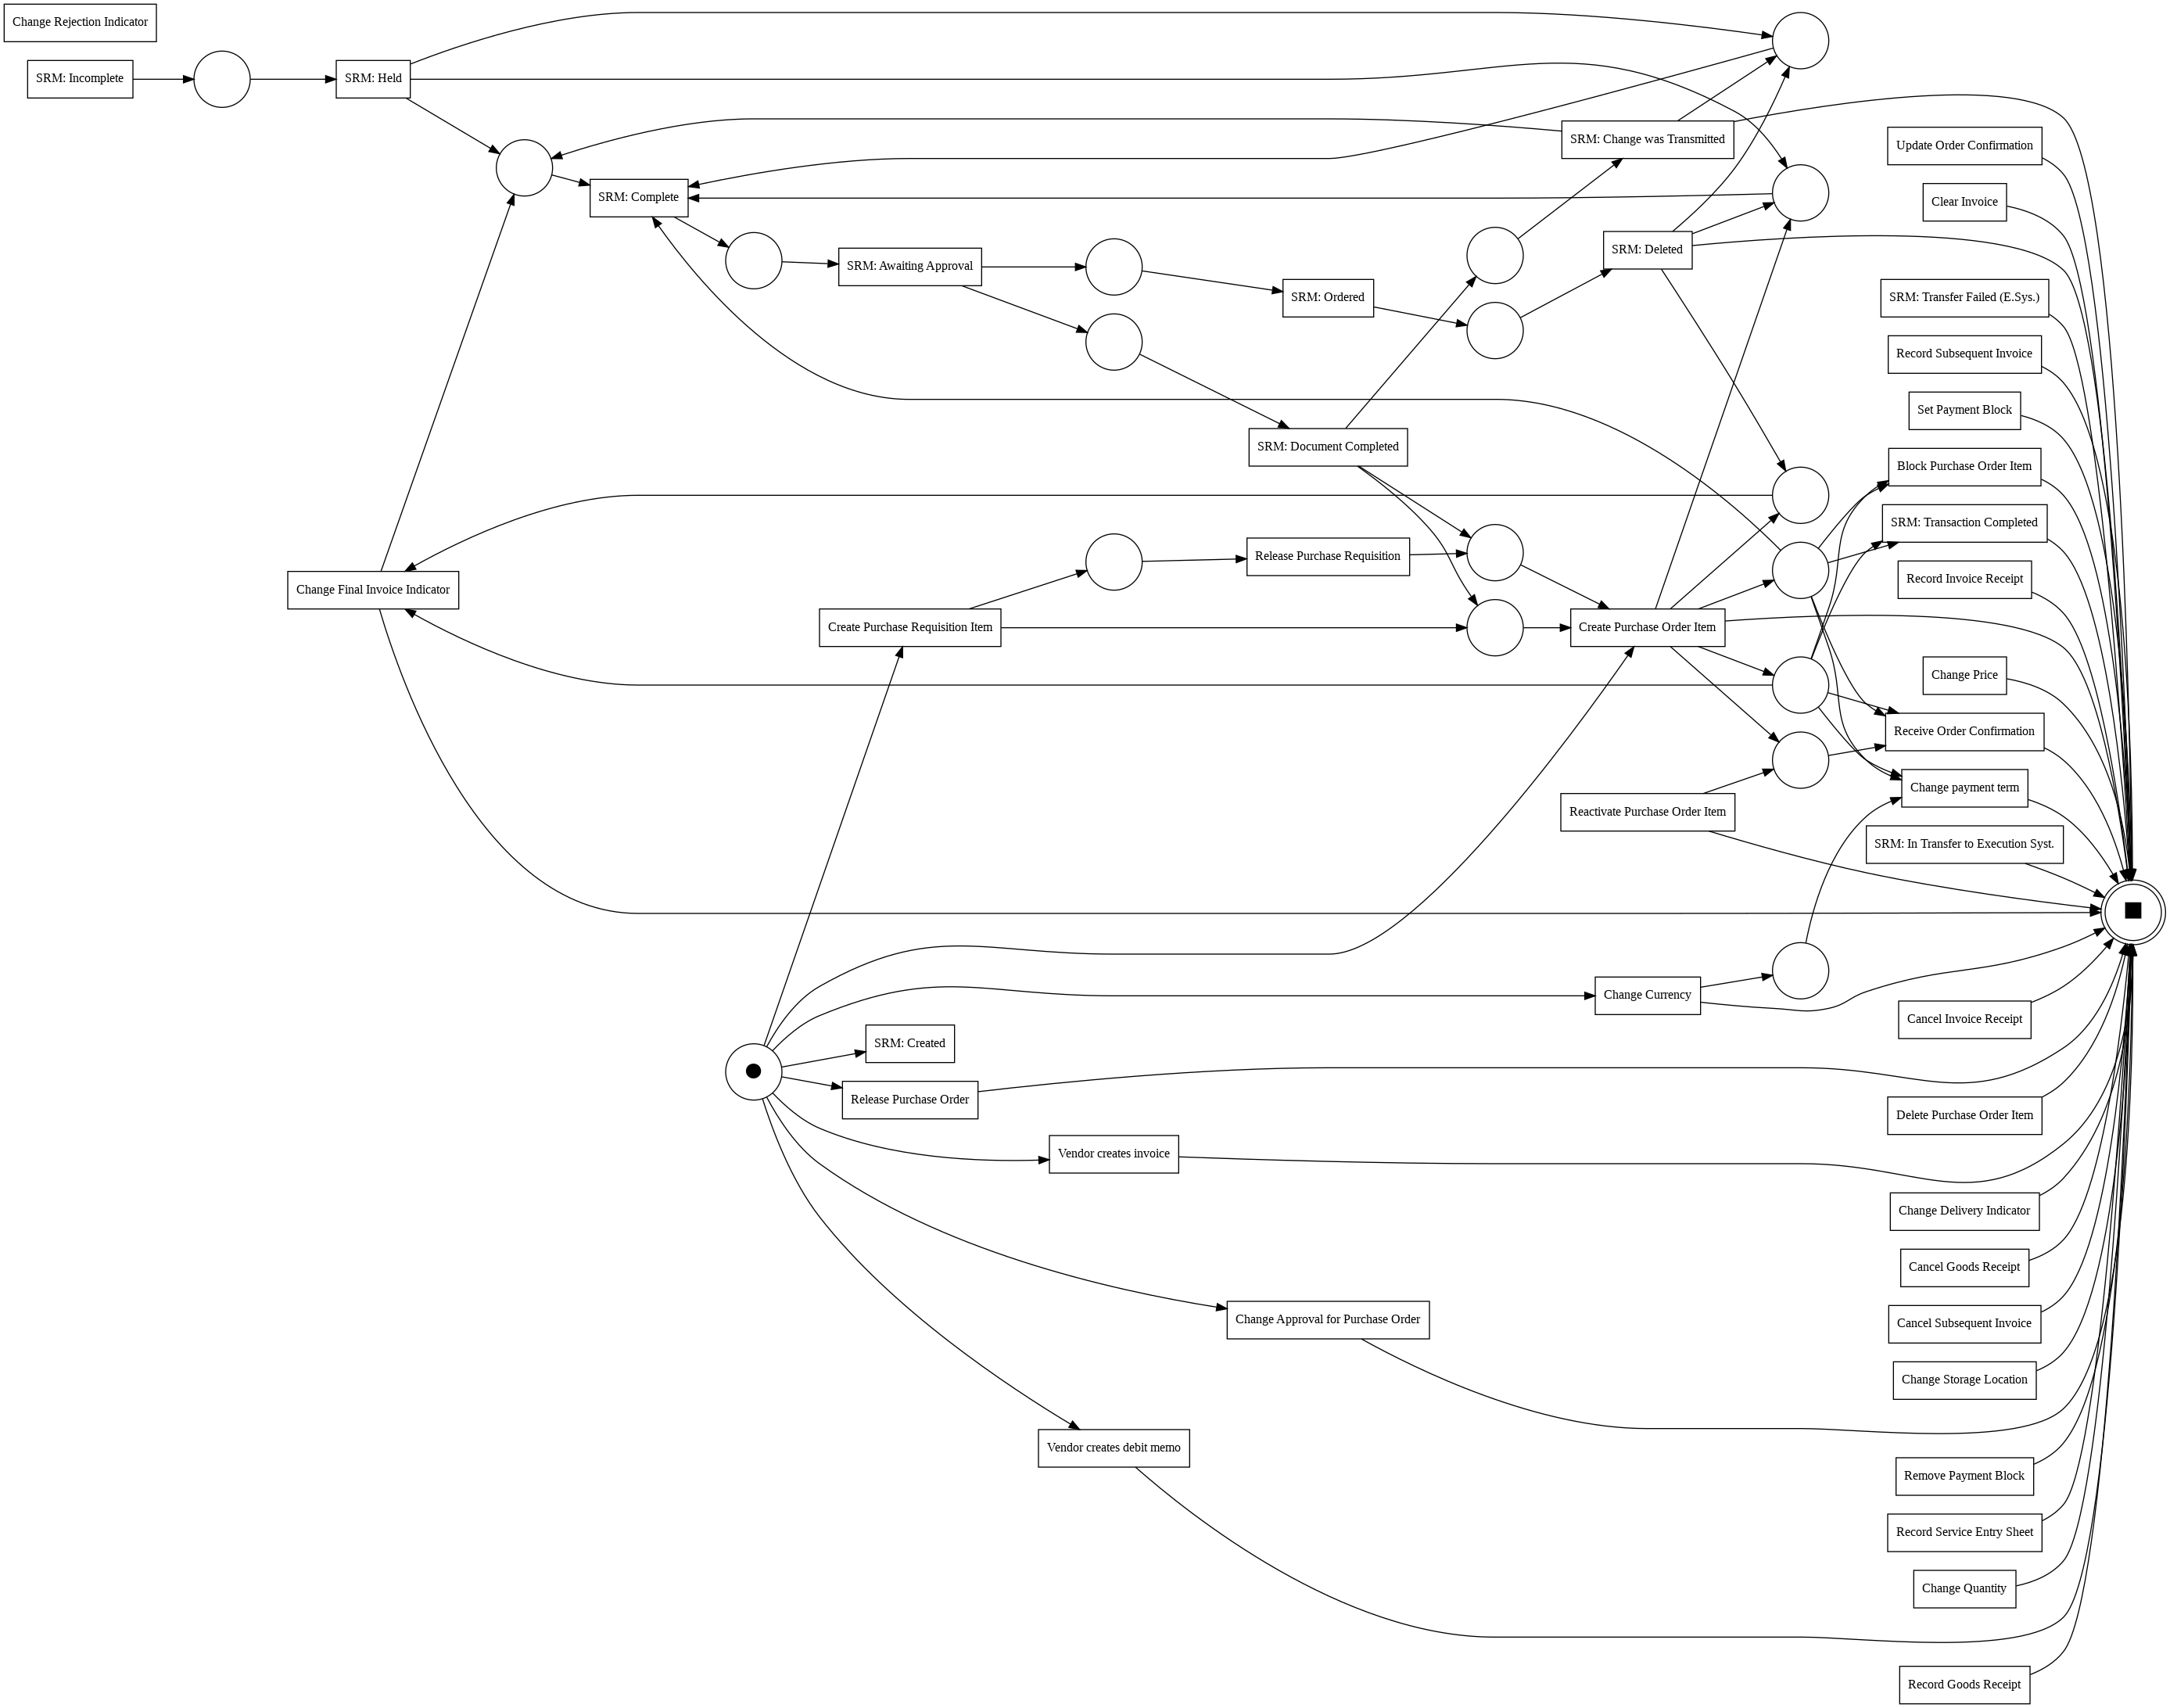

In [ ]:
if __name__ == "__main__":
    net, im, fm = pm4py.discover_petri_net_alpha(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
    pm4py.view_petri_net(net, im, fm, format='png')

# **7) Conformance checking(token based) for the alpha algorithm.**

In [ ]:
if __name__ == "__main__":
    fitness = pm4py.fitness_token_based_replay(log,net, im, fm, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
    print(fitness)

replaying log with TBR, completed traces ::   0%|          | 0/11973 [00:00<?, ?it/s]

{'perc_fit_traces': 0.0, 'average_trace_fitness': 0.3409435070484573, 'log_fitness': 0.33904459184056546, 'percentage_of_fitting_traces': 0.0}


# **8) Generate model using heuristic mining algorithm.**

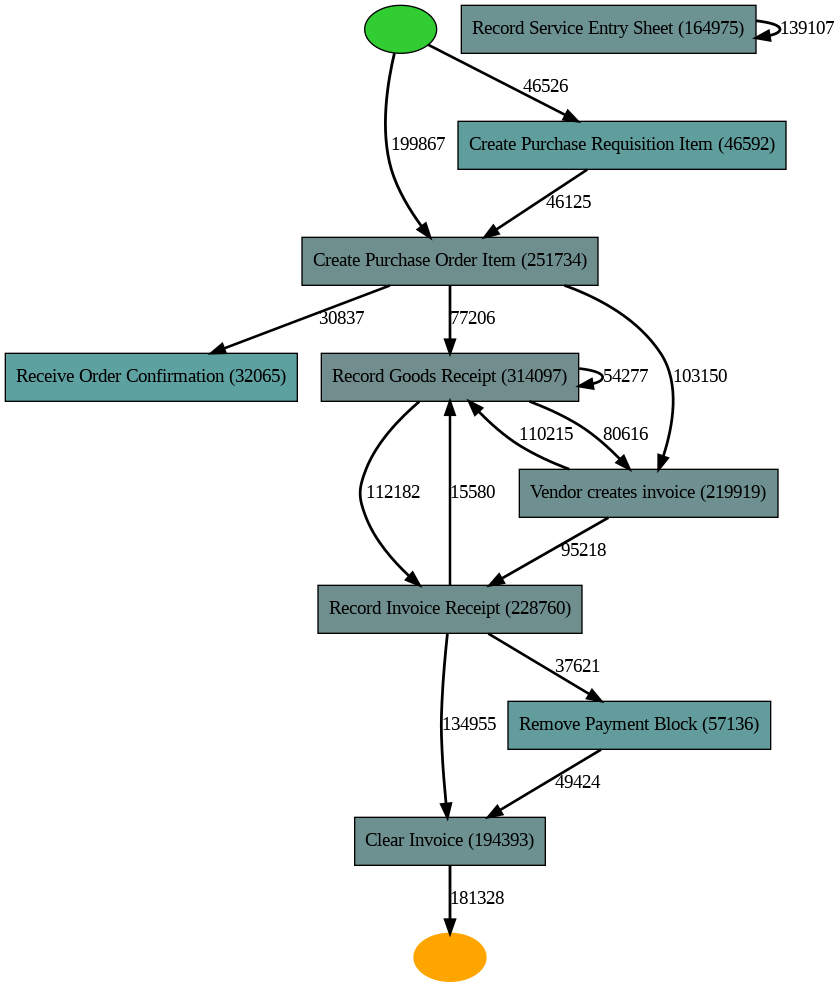

In [ ]:
if __name__ == "__main__":
    map = pm4py.discover_heuristics_net(log,dependency_threshold=0.9,and_threshold=0.5,min_act_count=25676,min_dfg_occurrences=25676)
    pm4py.view_heuristics_net(map)

# **9) Compute fitness for conformance checking of the heuristic mining algorithm.**

In PM4PY, in order to perform token based conformance checking, we need to convert the dfg map generated to petrinet first and then compute the fitness on the petri net.

In [ ]:
if __name__ == "__main__":
    net, im, fm = pm4py.convert_to_petri_net(map)
    fitness_alignments = pm4py.fitness_token_based_replay(log, net, im, fm, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
    print(fitness_alignments)

replaying log with TBR, completed traces ::   0%|          | 0/11973 [00:00<?, ?it/s]

{'perc_fit_traces': 6.749584879277332, 'average_trace_fitness': 0.9036211223591933, 'log_fitness': 0.8935916243695821, 'percentage_of_fitting_traces': 6.749584879277332}
